<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

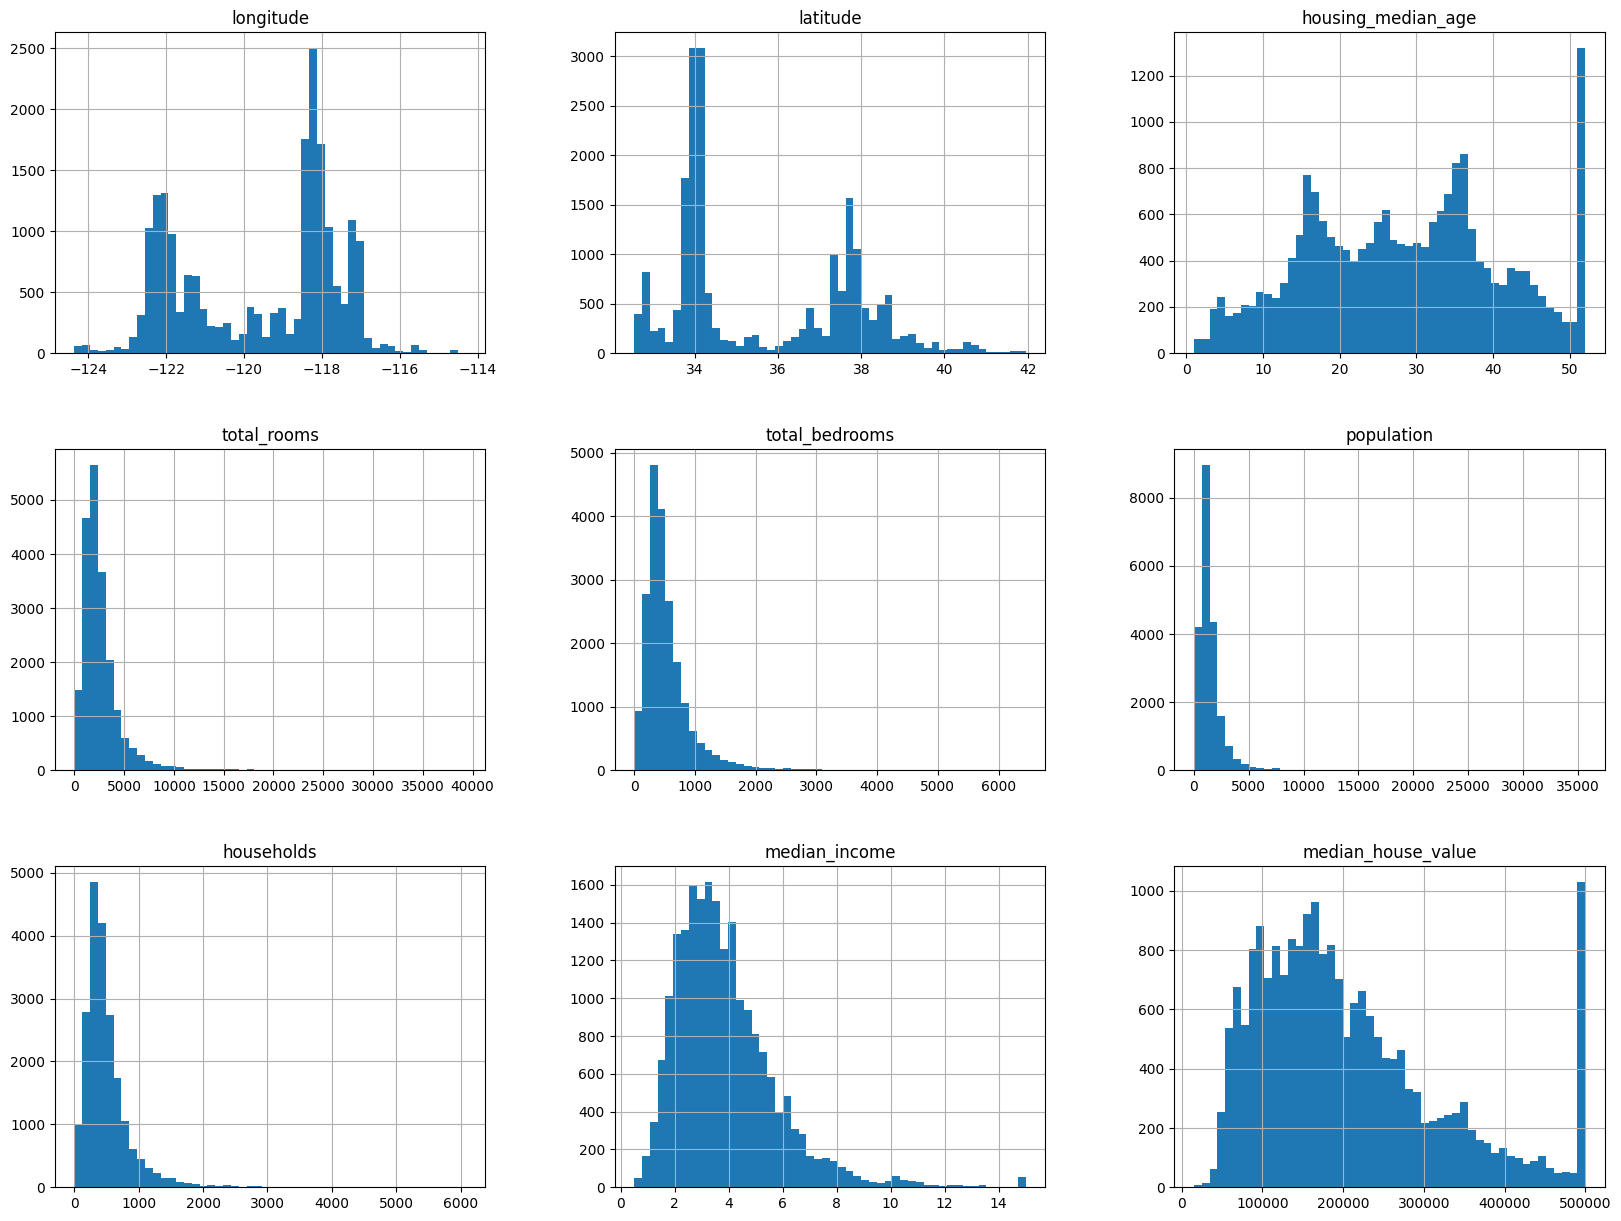

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Shape of prepared data: (20640, 8)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

housing = pd.read_csv('housing.csv')
print(housing.info())
print(housing.describe())

housing.hist(bins=50, figsize=(20,15))
plt.show()
print(housing.isnull().sum())

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']

X = housing[features]

preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

X_prepared = preprocessing_pipeline.fit_transform(X)

print("Shape of prepared data:", X_prepared.shape)

In [ ]:
import numpy as np
from typing import Callable

def manhattan_distance(x: np.ndarray, y: np.ndarray) -> float:
    return np.sum(np.abs(x - y))

def euclidean_distance(x: np.ndarray, y: np.ndarray) -> float:
    return np.sqrt(np.sum((x - y)**2))

def sup_distance(x: np.ndarray, y: np.ndarray) -> float:
    return np.max(np.abs(x - y))

def minkowski_distance(x: np.ndarray, y: np.ndarray, p: float) -> float:
    return np.sum(np.abs(x - y)**p)**(1/p) if p != float('inf') else sup_distance(x, y)

def initialize_centroids(X: np.ndarray, K: int) -> np.ndarray:
    return X[np.random.choice(X.shape[0], K, replace=False)]

def assign_clusters(X: np.ndarray, centroids: np.ndarray, distance_func: Callable) -> np.ndarray:
    distances = np.array([distance_func(x, centroids) for x in X])
    return np.argmin(distances, axis=1)

def update_centroids(X: np.ndarray, labels: np.ndarray, K: int) -> np.ndarray:
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])

def kmeans(X: np.ndarray, K: int, distance_func: Callable, max_iters: int = 100) -> tuple:
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        old_centroids = centroids.copy()
        labels = assign_clusters(X, centroids, distance_func)
        centroids = update_centroids(X, labels, K)
        if np.all(old_centroids == centroids):
            break

    return centroids, labels


Number of clusters: 2
SSE: 129446.04

Cluster 0:
Mean: [ 0.77028412 -0.78322574 -0.03013067  0.07732444  0.10323113  0.13467735
  0.10384427  0.03372715]
Std: [0.40132646 0.33065211 0.9609768  1.15978467 1.14974231 1.15031014
 1.13697144 1.01235043]

Cluster 1:
Mean: [-1.06135922  1.07919123  0.04151646 -0.10654381 -0.14224013 -0.18556926
 -0.14308496 -0.04647197]
Std: [0.46035119 0.46618812 1.04998372 0.71056517 0.72217334 0.70372062
 0.74923763 0.98083026]


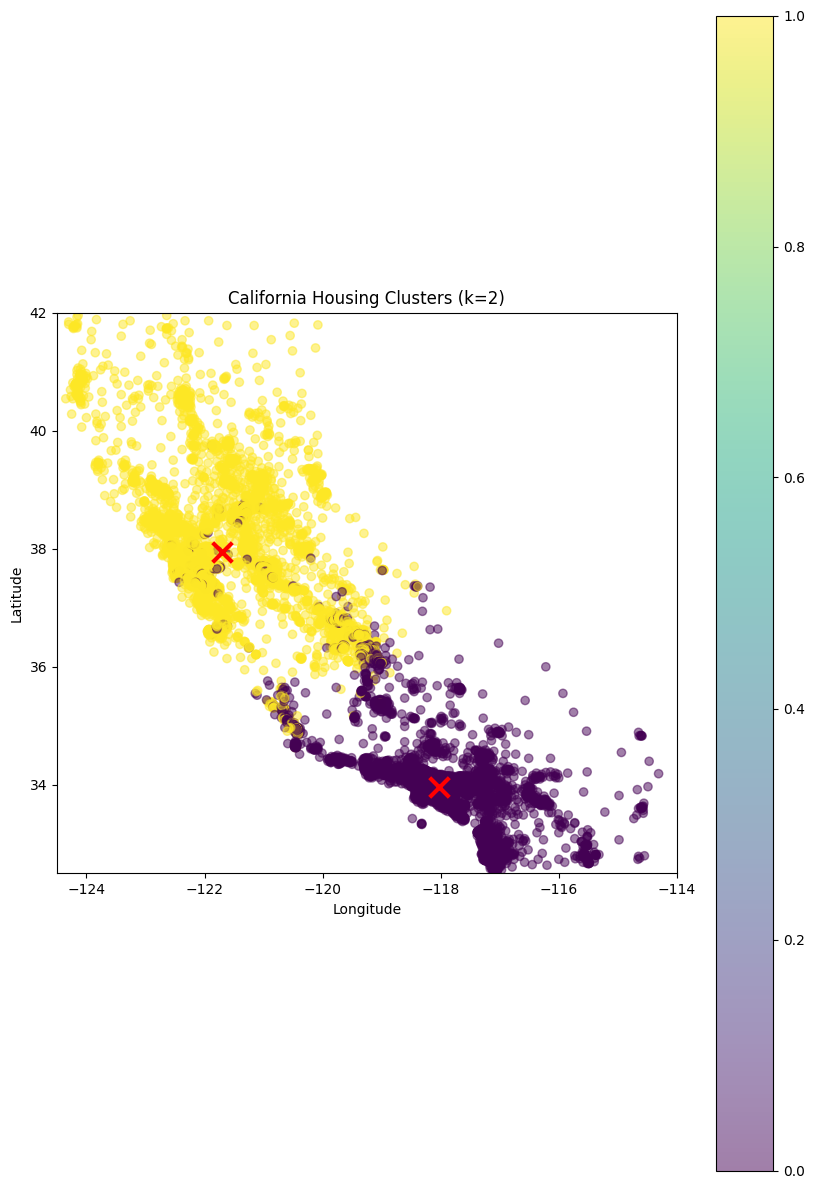

Number of clusters: 3
SSE: 89564.72

Cluster 0:
Mean: [-1.07354129  1.09171216  0.09084478 -0.20606477 -0.24218427 -0.28244456
 -0.2483807  -0.05386745]
Std: [0.44923766 0.46092809 1.04614445 0.52173961 0.53665781 0.53260679
 0.55469609 0.98523985]

Cluster 1:
Mean: [ 0.7730693  -0.79086575  0.08234532 -0.21767982 -0.20050849 -0.14216449
 -0.19566272  0.01156526]
Std: [0.37341435 0.30707171 0.92240846 0.49717769 0.52731086 0.56798001
 0.52743354 1.0165113 ]

Cluster 2:
Mean: [ 0.20404523 -0.17781383 -0.94828117  2.34565948  2.4082148   2.2309282
  2.40697525  0.18177691]
Std: [0.96957846 0.90713281 0.71590121 1.78390065 1.60763135 1.78125591
 1.5793341  0.93868779]


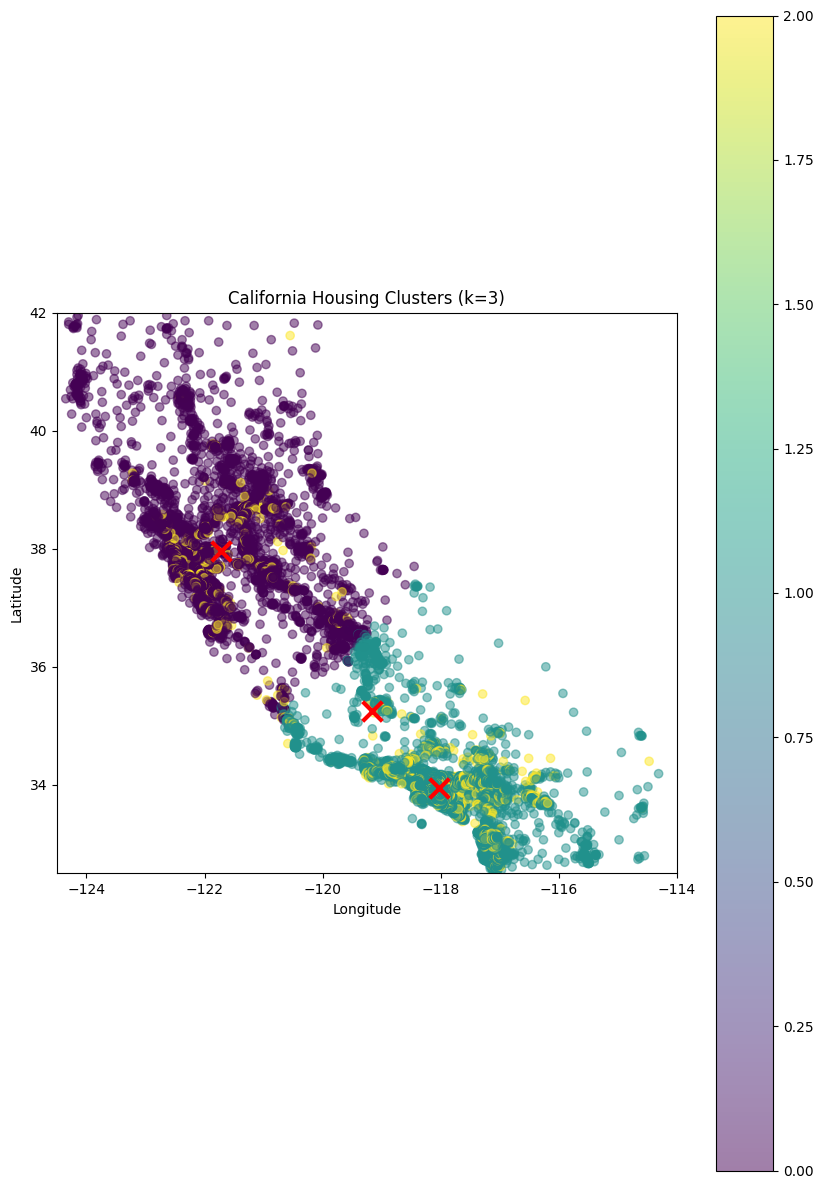

Number of clusters: 4
SSE: 76697.94

Cluster 0:
Mean: [ 0.34118728 -0.25096743 -1.30604561  5.10793932  4.98680145  4.7307761
  4.9300245   0.28208072]
Std: [0.95846988 0.90056599 0.61916671 2.37202189 1.98438119 2.67579733
 2.00471595 0.81091739]

Cluster 1:
Mean: [-1.07900774  1.10254009  0.14194917 -0.27069864 -0.30845159 -0.34563314
 -0.31783389 -0.06352868]
Std: [0.45019549 0.46238717 1.03953061 0.45444671 0.46819326 0.46902413
 0.48217362 0.99011811]

Cluster 2:
Mean: [ 0.20696896 -0.21148584 -0.77442062  1.20007998  1.28987886  1.19794836
  1.30350385  0.11477688]
Std: [0.93504209 0.87821821 0.735621   0.78490843 0.75755435 0.78978755
 0.73336913 0.95567924]

Cluster 3:
Mean: [ 0.77281945 -0.79279371  0.16578907 -0.31565604 -0.30946286 -0.24415908
 -0.30442907  0.00594027]
Std: [0.37270059 0.30743974 0.90322513 0.40350897 0.42126884 0.47416877
 0.42560656 1.02126098]


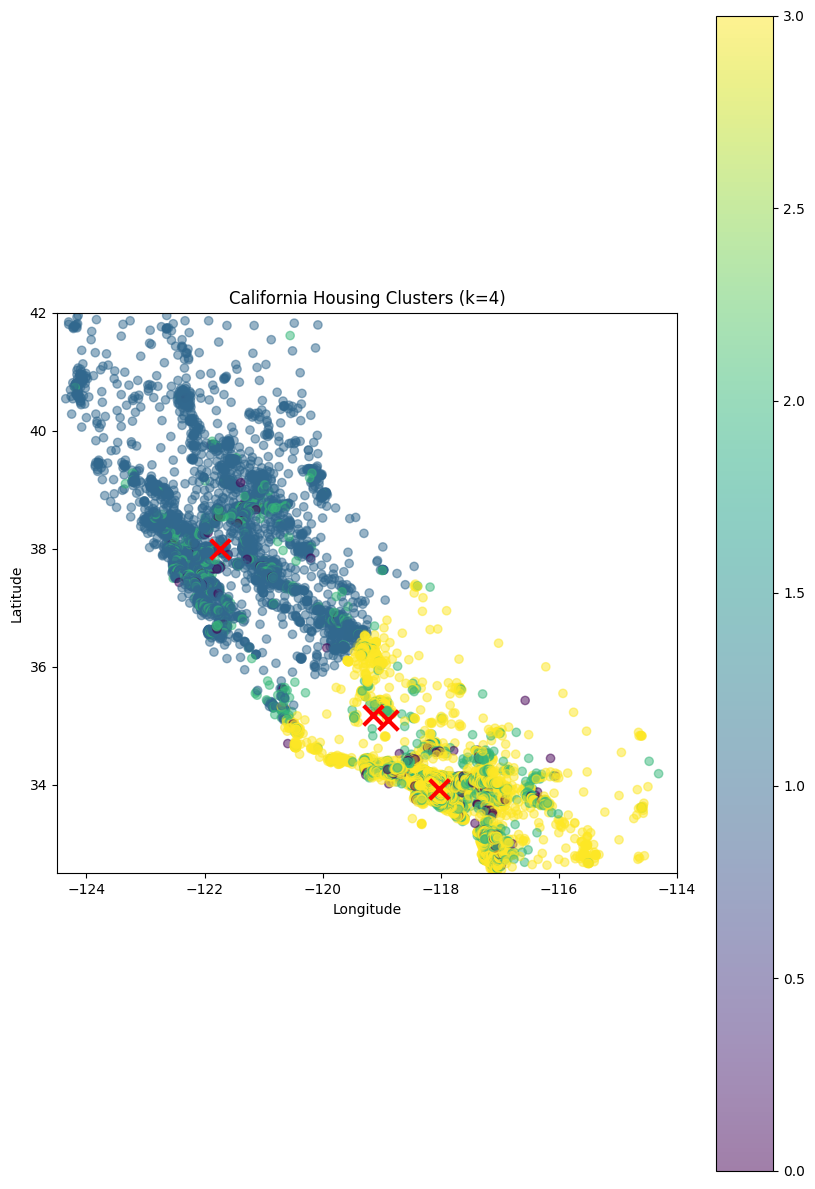

Number of clusters: 5
SSE: 70428.83

Cluster 0:
Mean: [ 0.7592967  -0.7824867   0.26459016 -0.40391693 -0.40506822 -0.33748751
 -0.40064548 -0.00233499]
Std: [0.37116352 0.30888855 0.88154648 0.34015878 0.35371876 0.40741878
 0.35997325 1.02583502]

Cluster 1:
Mean: [-1.08757104  1.10988583  0.37357122 -0.4372038  -0.46631488 -0.5017503
 -0.48207161 -0.13851343]
Std: [0.45880864 0.45992913 0.99758537 0.33872592 0.36617721 0.36364238
 0.37928275 0.97722229]

Cluster 2:
Mean: [ 0.83584059 -0.81849019 -0.62223483  0.71575662  0.82461397  0.80311106
  0.82238157  0.07478589]
Std: [0.35534919 0.28088009 0.75171715 0.67386202 0.68270762 0.7103221
 0.64776965 0.99307618]

Cluster 3:
Mean: [-1.02941544  1.02168608 -0.70641569  0.60675839  0.55242026  0.4831393
  0.57972482  0.17254302]
Std: [0.42210163 0.46727989 0.76282675 0.63483789 0.6556892  0.64625227
 0.66832879 0.94331082]

Cluster 4:
Mean: [ 0.27713532 -0.21676265 -1.16963842  4.17077675  4.14353343  3.92954962
  4.12254531  0.27442012

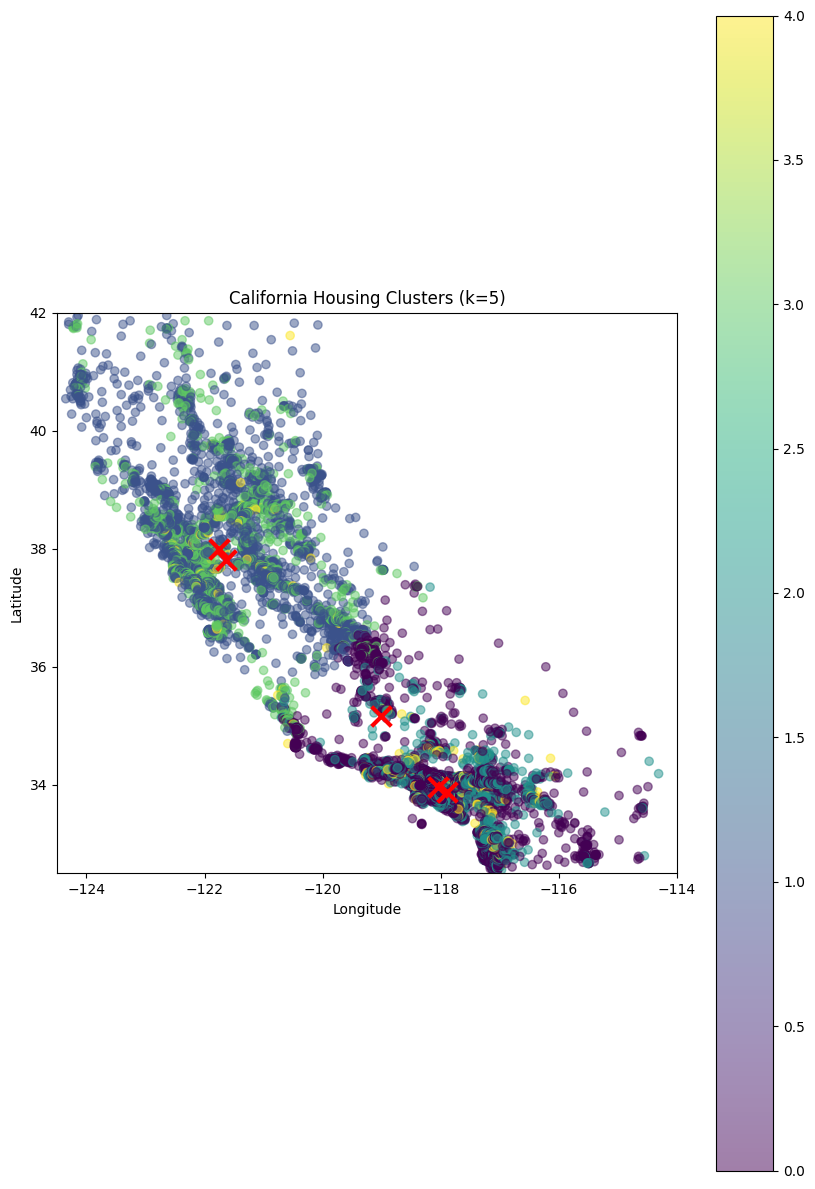

Number of clusters: 6
SSE: 64946.48

Cluster 0:
Mean: [ 0.83310263 -0.81439893 -0.63790812  0.72371156  0.82870011  0.80769403
  0.82614104  0.08134192]
Std: [0.35695778 0.28559324 0.74661574 0.69322064 0.69703325 0.726832
 0.66321318 0.99481635]

Cluster 1:
Mean: [-1.17527055  1.06852903  1.07253304 -0.40979001 -0.41167694 -0.45013222
 -0.40938113 -0.23801921]
Std: [0.40348893 0.39469077 0.5880817  0.37146051 0.41200187 0.41490792
 0.42623836 0.86137097]

Cluster 2:
Mean: [-0.90765903  1.06602151 -0.72223313 -0.28983369 -0.37372614 -0.39083673
 -0.39958308  0.07771938]
Std: [0.5248886  0.57742306 0.54469081 0.39002636 0.37266954 0.39494512
 0.38504981 1.08456962]

Cluster 3:
Mean: [-1.10072311  1.04077633 -0.6181479   0.97130773  0.96025219  0.85292159
  1.00299894  0.10892276]
Std: [0.35575129 0.42602626 0.77789911 0.67090376 0.64902141 0.6857017
 0.66070396 0.88909553]

Cluster 4:
Mean: [ 0.35898946 -0.29000319 -1.21158343  4.41344584  4.38437508  4.13210185
  4.34695746  0.26095926

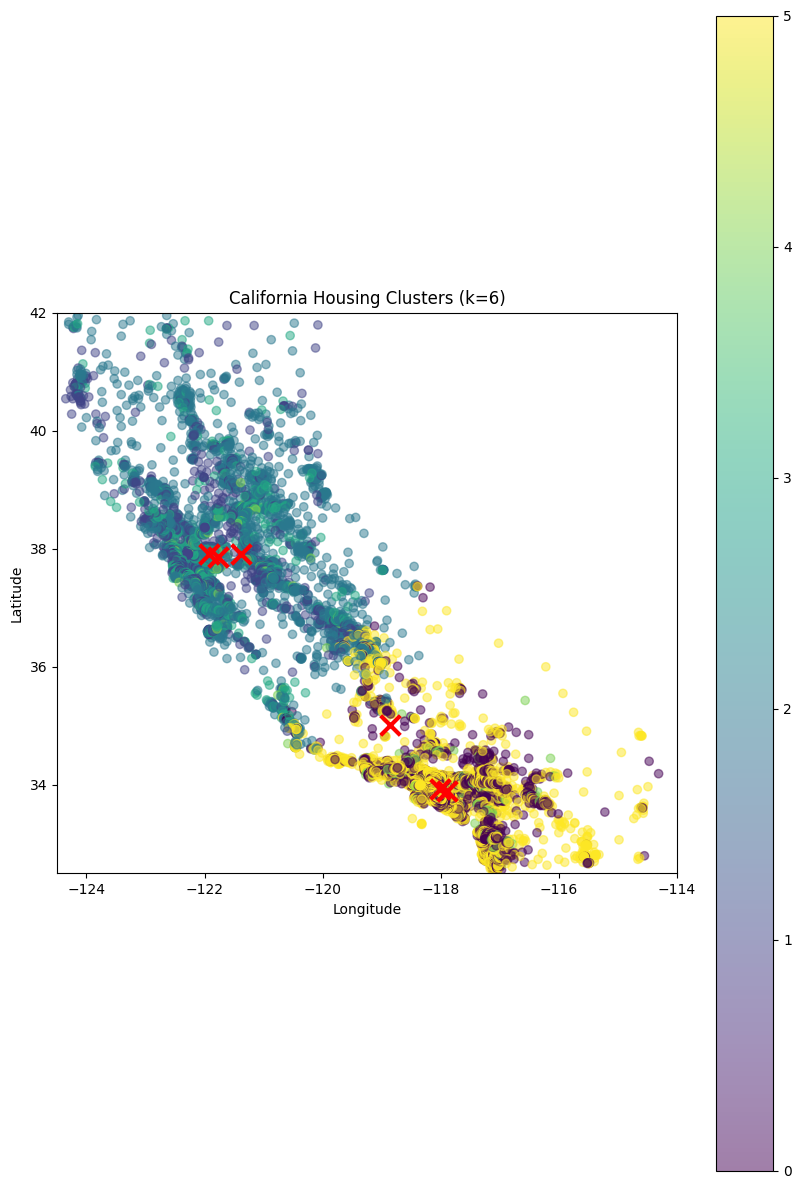

Number of clusters: 7
SSE: 58051.39

Cluster 0:
Mean: [ 0.57721249 -0.67205486 -0.31260292 -0.07117229 -0.38088412 -0.33246953
 -0.36164112  1.83157689]
Std: [0.66219211 0.55035952 0.94921014 0.52018336 0.39125817 0.4302882
 0.40288339 1.20095446]

Cluster 1:
Mean: [-1.10025375  1.03707644 -0.61722977  1.0253013   1.01000892  0.90292508
  1.05651853  0.12161063]
Std: [0.34855772 0.41422569 0.78398751 0.67655362 0.66302489 0.69617694
 0.67055138 0.84558186]

Cluster 2:
Mean: [ 0.77333125 -0.78470915  0.3916464  -0.42705026 -0.36579872 -0.29199793
 -0.36326778 -0.35782359]
Std: [0.36652787 0.30773716 0.8016183  0.33139531 0.38065274 0.43972105
 0.38612022 0.58678822]

Cluster 3:
Mean: [-1.18930476  1.07143443  1.07274144 -0.40260038 -0.40883015 -0.45208118
 -0.40480829 -0.22087917]
Std: [0.38400868 0.37956148 0.58304598 0.37380942 0.41152932 0.39357848
 0.42647597 0.78615321]

Cluster 4:
Mean: [ 0.84234671 -0.81298071 -0.661071    0.80500625  0.98399412  0.94178795
  0.97660199 -0.098261

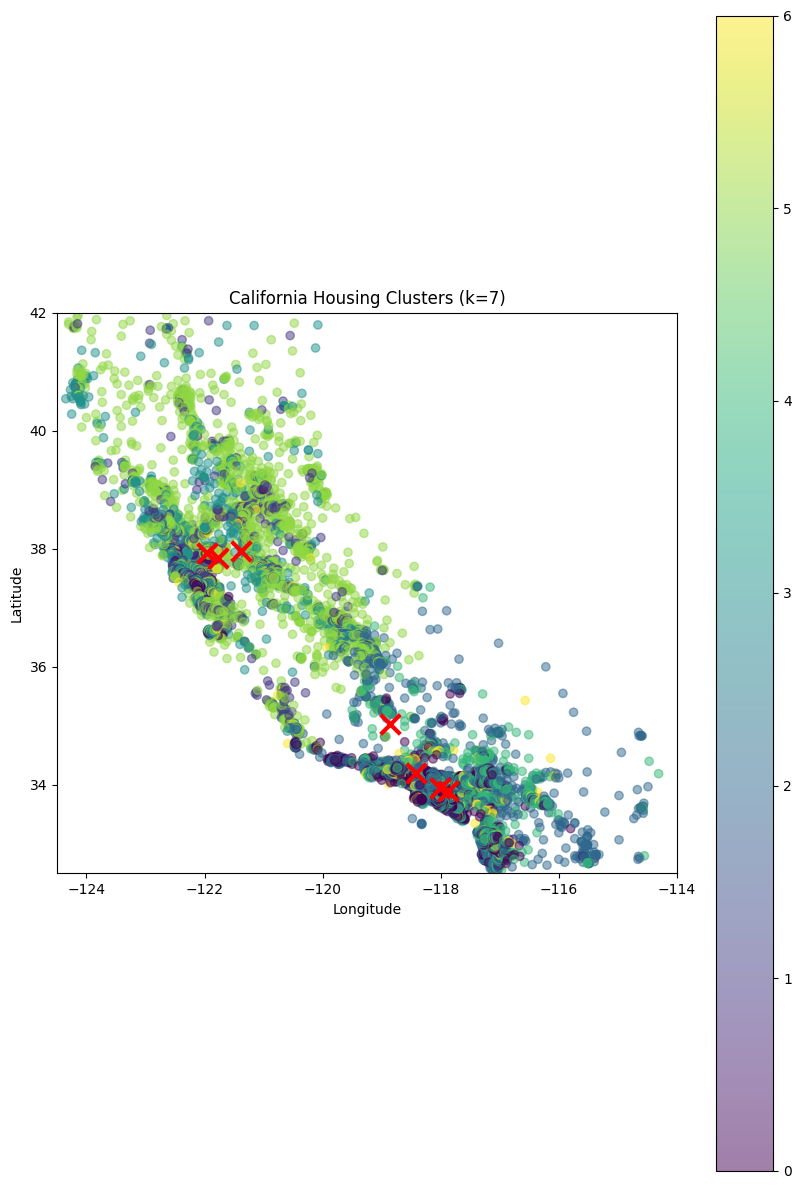

Number of clusters: 8
SSE: 52232.57

Cluster 0:
Mean: [ 0.84063249 -0.82108414 -0.51574592  0.29087468  0.42470923  0.43569657
  0.42251514 -0.17594221]
Std: [0.3822167  0.31978775 0.74679101 0.46405208 0.48338978 0.58492358
 0.46681451 0.66247192]

Cluster 1:
Mean: [-0.8716598   1.10559023 -0.7190422  -0.39979027 -0.44806686 -0.47155256
 -0.48600669 -0.2167653 ]
Std: [0.54604095 0.60276962 0.52771856 0.33645455 0.33758688 0.36254186
 0.3463407  0.76313873]

Cluster 2:
Mean: [-1.1000847   1.04481788 -0.56356725  0.66834789  0.63145138  0.55315983
  0.66821416  0.11967716]
Std: [0.36547931 0.42795279 0.76114798 0.49842651 0.50321702 0.51128951
 0.50399381 0.81977569]

Cluster 3:
Mean: [ 0.44790208 -0.56811833 -0.25614072 -0.07254732 -0.41489115 -0.36785934
 -0.39442637  2.13777997]
Std: [0.76630364 0.64818264 0.96607206 0.5492473  0.39386991 0.43666861
 0.40713958 1.19020523]

Cluster 4:
Mean: [ 0.30538183 -0.24971658 -1.4029314   6.28331494  5.94897889  5.82325523
  5.98188349  0.42151

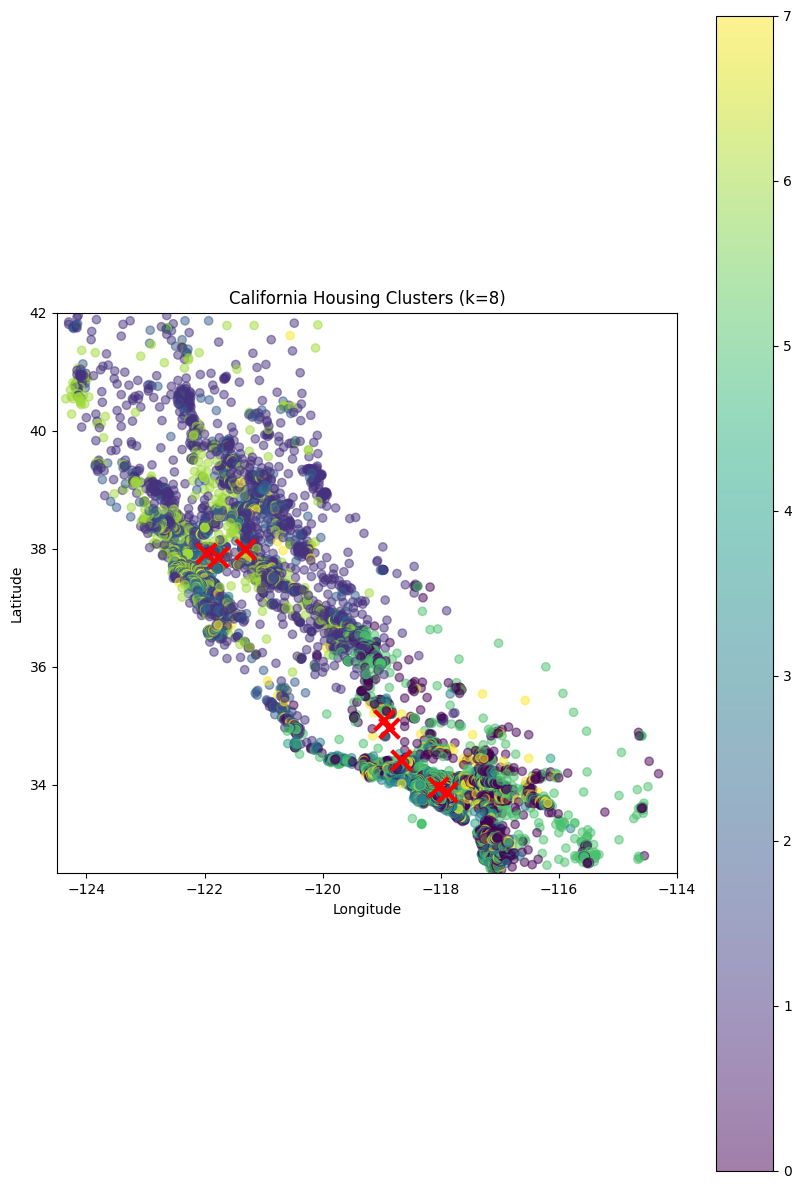

Number of clusters: 9
SSE: 49294.37

Cluster 0:
Mean: [ 0.83579655 -0.81808015 -0.47253586  0.33710741  0.52711717  0.5385598
  0.52454386 -0.28457615]
Std: [0.37956234 0.31075365 0.74968941 0.48023861 0.48650854 0.60245622
 0.4673546  0.60019342]

Cluster 1:
Mean: [-1.08814799  1.05448319 -0.59932022  0.71561353  0.71627919  0.61836318
  0.75029372 -0.0031476 ]
Std: [0.37430605 0.44095028 0.76574418 0.51447198 0.50208064 0.52034262
 0.5040566  0.70038186]

Cluster 2:
Mean: [-1.20577102  0.93166418 -0.09252785 -0.15305039 -0.44830348 -0.389003
 -0.41558823  1.70673682]
Std: [0.23893622 0.21931205 0.87709479 0.49195534 0.3679908  0.44263841
 0.39413523 1.04887355]

Cluster 3:
Mean: [-0.82100626  1.12188529 -0.72183641 -0.40125207 -0.418032   -0.45992363
 -0.4660584  -0.43826368]
Std: [0.56816854 0.63635032 0.53256792 0.34112892 0.35315831 0.3726906
 0.36154021 0.56104803]

Cluster 4:
Mean: [ 0.33202398 -0.30202763 -0.96333873  2.26829187  2.3851821   2.15518898
  2.3672981   0.18386252]

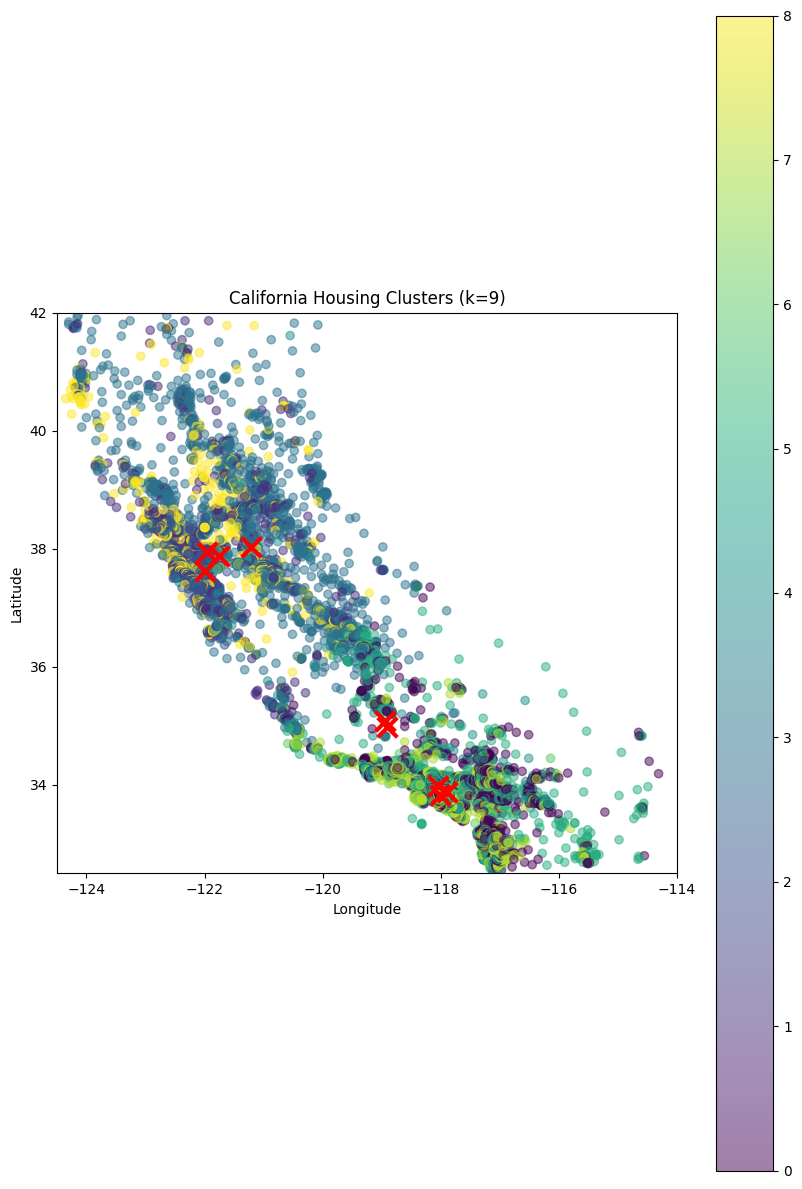

Number of clusters: 10
SSE: 48469.13

Cluster 0:
Mean: [-1.16375622  1.09986493  0.92569178 -0.45251237 -0.44424405 -0.49365941
 -0.45114488 -0.34794654]
Std: [0.40862393 0.40763114 0.70547108 0.37116874 0.43035404 0.39438314
 0.44334585 0.65472238]

Cluster 1:
Mean: [ 0.3602774  -0.294022   -1.42111572  6.37781948  6.03637927  5.90460696
  6.06165629  0.41002335]
Std: [0.92804853 0.9107943  0.5539678  2.44992421 2.08472445 3.0185935
 2.03336338 0.84261401]

Cluster 2:
Mean: [ 0.77553384 -0.84367449 -0.47256236  0.05093942 -0.25531623 -0.20222793
 -0.22839559  1.40075228]
Std: [0.35103174 0.26282808 0.74187223 0.48787114 0.38375298 0.40045256
 0.3885001  0.69874647]

Cluster 3:
Mean: [ 0.71595973 -0.7435451   0.34697382 -0.03048378  0.17453432  0.31844127
  0.20009457 -0.49600161]
Std: [0.34976877 0.34157618 0.5471398  0.30218589 0.32240738 0.45762106
 0.31837056 0.50211706]

Cluster 4:
Mean: [ 0.84123436 -0.73214843 -0.87420051 -0.42887628 -0.37398323 -0.39758598
 -0.41048219 -0.41876

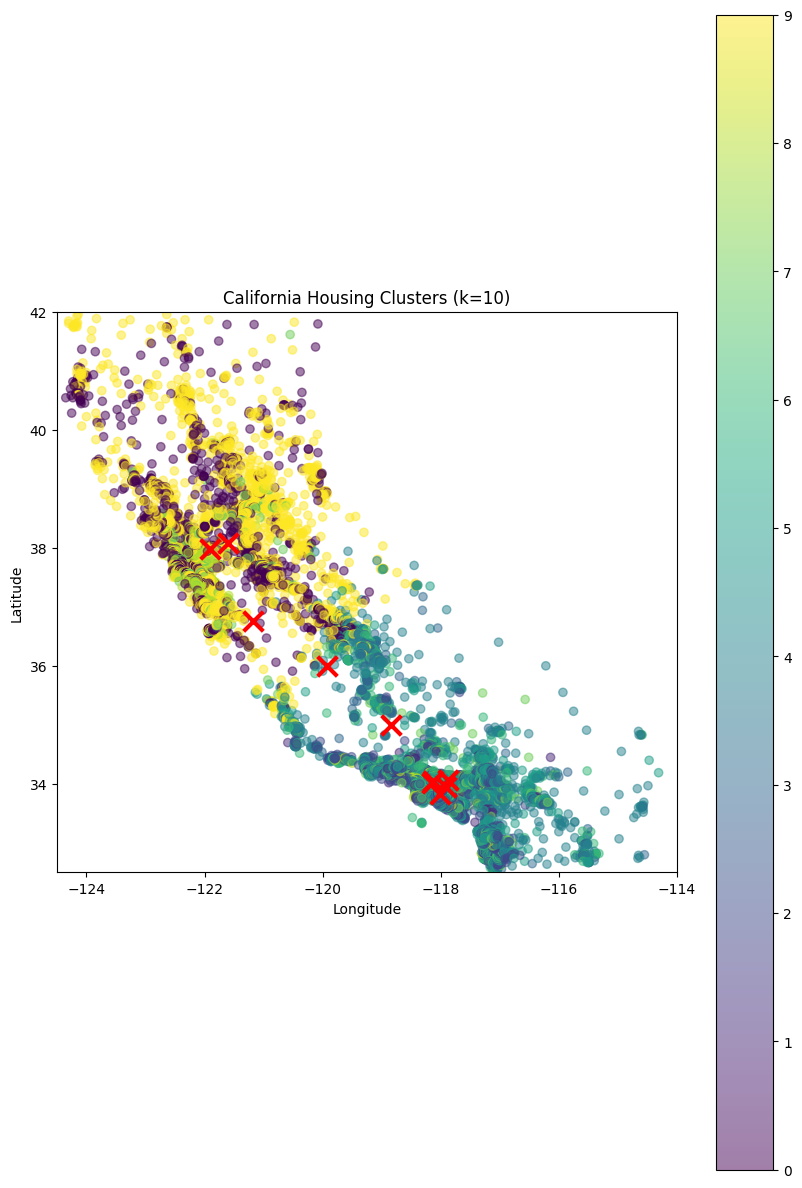

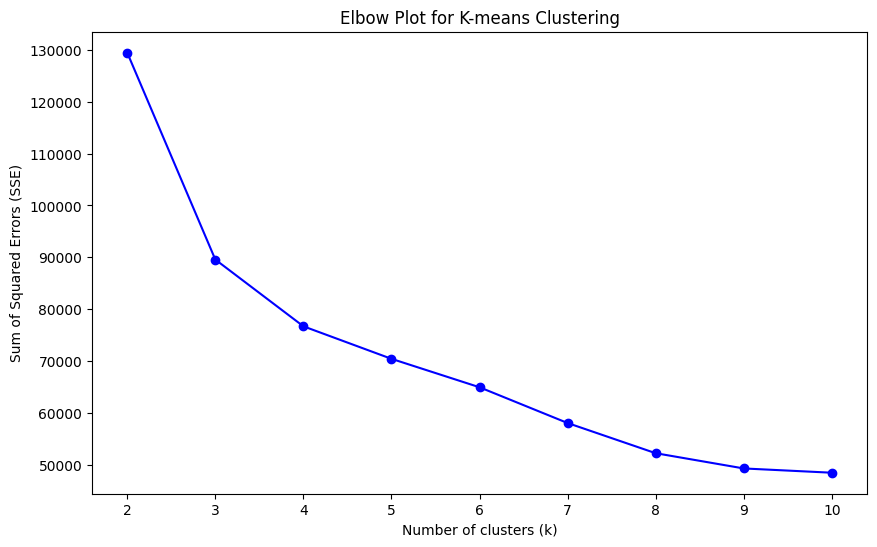

Number of clusters: 2
SSE: 129446.05

Cluster 0:
Mean: [ 0.77006434 -0.78300961 -0.03035998  0.07742902  0.10337401  0.13502026
  0.10400991  0.03360503]
Std: [0.40170042 0.3310467  0.96106006 1.15972037 1.1497098  1.15076505
 1.13696613 1.01230991]

Cluster 1:
Mean: [-1.06147841  1.07932253  0.04184905 -0.10673034 -0.14249365 -0.18611573
 -0.14337019 -0.04632212]
Std: [0.4602798  0.46616153 1.0498761  0.71053075 0.72204035 0.70232624
 0.74905152 0.98089351]


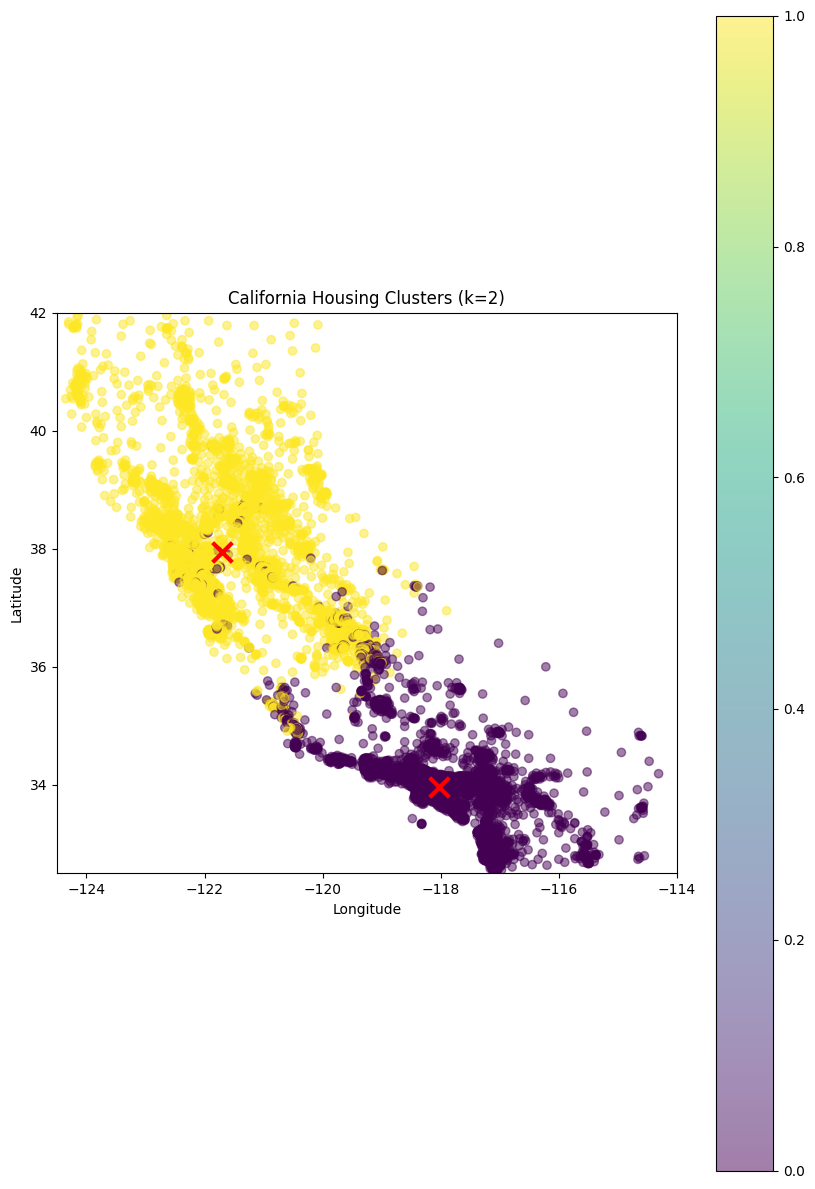

Number of clusters: 10
SSE: 47032.86

Cluster 0:
Mean: [-1.06608535  1.03749236 -0.56473187  0.45113727  0.41215022  0.35461612
  0.4341027   0.06706032]
Std: [0.40232266 0.46096745 0.72576175 0.38687804 0.40812948 0.42311175
 0.39692931 0.75692995]

Cluster 1:
Mean: [ 0.71047108 -0.75384052  0.7639529  -0.48302488 -0.44726401 -0.35312849
 -0.43788745 -0.28486708]
Std: [0.3124251  0.28590093 0.53016703 0.29614167 0.3283473  0.39070383
 0.33631479 0.66893264]

Cluster 2:
Mean: [ 0.80479294 -0.80204282 -0.33217798  0.41130621  0.60238102  0.644573
  0.61248609 -0.24064133]
Std: [0.35787302 0.30049669 0.72569598 0.45891972 0.44976307 0.56984233
 0.42010046 0.68792661]

Cluster 3:
Mean: [ 0.29530478 -0.23959492 -1.39633176  6.25636022  5.92569463  5.80980518
  5.96004718  0.41782033]
Std: [0.95529941 0.92082309 0.55933981 2.44050102 2.08167399 2.97159034
 2.02362135 0.83731419]

Cluster 4:
Mean: [-0.87455963  1.14239975 -0.6843585  -0.45743201 -0.49528177 -0.52192772
 -0.53948524 -0.289590

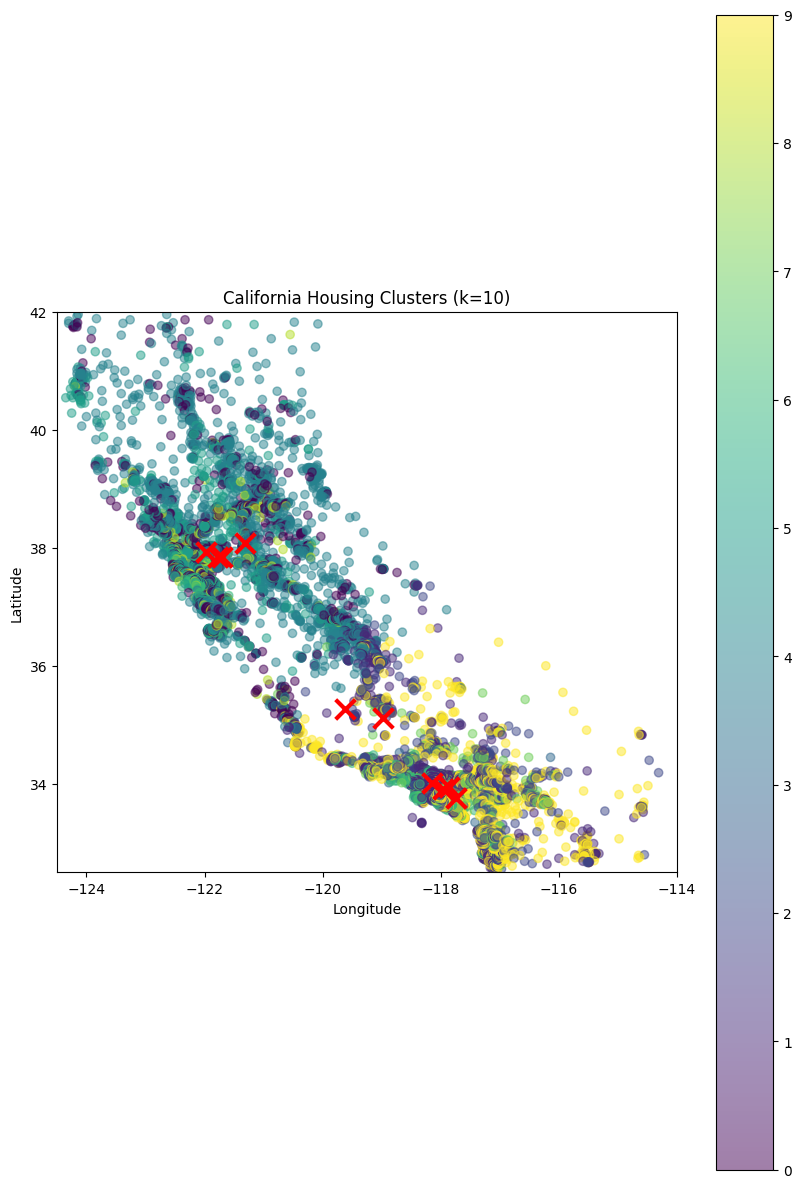

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from typing import Callable


def analyze_clusters(X_scaled, X_original, labels, centroids, k):
    sse = calculate_sse(X_scaled, centroids, labels)
    cluster_means = [X_scaled[labels == i].mean(axis=0) for i in range(k)]
    cluster_stds = [X_scaled[labels == i].std(axis=0) for i in range(k)]

    print(f"Number of clusters: {k}")
    print(f"SSE: {sse:.2f}")
    for i in range(k):
        print(f"\nCluster {i}:")
        print("Mean:", cluster_means[i])
        print("Std:", cluster_stds[i])

    plt.figure(figsize=(10, 15))
    scatter = plt.scatter(X_original[:, 0], X_original[:, 1], c=labels, cmap='viridis', alpha=0.5)

    centroids_original = scaler.inverse_transform(centroids)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='x', s=200, linewidths=3)

    plt.colorbar(scatter)
    plt.title(f'California Housing Clusters (k={k})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-124.5, -114)
    plt.ylim(32.5, 42)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

sse_values = []
for k in range(2, 11):
    centroids, labels = kmeans(X_prepared, k, lambda x, c: np.array([euclidean_distance(x, ci) for ci in c]))
    sse = calculate_sse(X_prepared, centroids, labels)
    sse_values.append(sse)
    analyze_clusters(X_prepared, X_original, labels, centroids, k)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot for K-means Clustering')
plt.show()

for k in [2, 10]:
    centroids, labels = kmeans(X_prepared, k, lambda x, c: np.array([euclidean_distance(x, ci) for ci in c]))
    analyze_clusters(X_prepared, X_original, labels, centroids, k)